CLEENG

# SCRAPING

In [2]:
import requests

# On importe la fonction 'get' (téléchargement) de 'requests' 
# Et la classe 'Selector' (Parsing) de 'scrapy'
from requests import get
#from scrapy import Selector

# Lien de la page à scraper
url = "https://cleeng.com/jobs"

response = get(url)
source = None # Le code source de la page 

if response.status_code == 200 :
    # Si la requete s'est bien passee
    source = response.text
    
#print(source)

# PARSING

In [3]:
import bs4

from bs4 import BeautifulSoup


<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <title>
   Job openings at Cleeng
  </title>
  <meta content="" name="description"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
  <link href="" rel="apple-touch-icon" sizes="57x57"/>
  <link href="" rel="apple-touch-icon" sizes="60x60"/>
  <link href="" rel="apple-touch-icon" sizes="72x72"/>
  <link href="" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/assets/1a8e299b0427a9a93a93b97028b1a34e.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/assets/3e6eda44f4bc4022b986f9b5549f006d.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="/assets/d058755b96a7a98bd8eca3632fb74d85.png" rel="apple-touch-icon" sizes="144x144"/>
  <link href="/assets/e70db7841c43f05b26422883e60610d8.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="/assets/70f4289bdfc68965b18343cf5bae7528.png" re
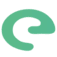
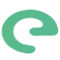
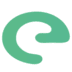
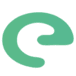
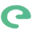
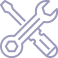
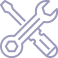

In [4]:
soup = BeautifulSoup(source, 'html.parser')

print(soup.prettify())

Functions

In [5]:
def extract_data_cleeng(articles):
    
    for article in articles:
        
        #offer_link
        link = article.a.get('href')    
        full_link = "http://cleeng.com" + link
        print(full_link)
        
        #Job name
        print(soup.find_all('span'))

In [6]:
articles = soup.find_all('article')

#print(articles)

database = [['job_name', 'country', 'city', 'offer_link']]

In [7]:
for article in articles:
            
    #JOB_NAME
    span_content = article.find("span", class_ = "_2FV7e")
    #print(span_content)
    job_name = span_content.text
    #print(job_name)        
    
    ## The separator is preceded by the city and followed by the country in the source page
    separator = article.find("span", class_ = "_3uSDU")

    # COUNTRY
    country = separator.next_sibling.text.strip(' \n\t')
    print(country)
    
    # CITY
    #city = article.find("span").text
    city = separator.previous_sibling.text.strip(' \n\t')
    print(city)
    
    # OFFER_LINK
    link = article.a.get('href')    
    offer_link = "http://cleeng.com" + link
    #print(offer_link)
    
    database.append([job_name, country, city, offer_link])
    

Poland
Poznan
Netherlands
Amsterdam
Poland
Poznan
Poland
Poznan
Poland
Poznan
Netherlands
Amsterdam
Poland
Poznan
Philippines
Manila
Poland
Poznan
Poland
Poznan


In [8]:
print(database)

[['job_name', 'country', 'city', 'offer_link'], ['Product Marketing Coordinator  – Intern', 'Poland', 'Poznan', 'http://cleeng.com/jobs/product-marketing-coordinator-intern'], ['(Digital) Marketing Specialist – Intern', 'Netherlands', 'Amsterdam', 'http://cleeng.com/jobs/digital-marketing-specialist-intern-2'], ['(Digital) Marketing Specialist – Intern', 'Poland', 'Poznan', 'http://cleeng.com/jobs/digital-marketing-specialist-intern'], ['Scrum Master', 'Poland', 'Poznan', 'http://cleeng.com/jobs/scrum-master'], ['Lead Fullstack Engineer', 'Poland', 'Poznan', 'http://cleeng.com/jobs/lead-fullstack-engineer'], ['Growth Marketing Manager', 'Netherlands', 'Amsterdam', 'http://cleeng.com/jobs/growth-marketing-manager-2'], ['Growth Marketing Manager', 'Poland', 'Poznan', 'http://cleeng.com/jobs/growth-marketing-manager'], ['Inside Sales Manager', 'Philippines', 'Manila', 'http://cleeng.com/jobs/inside-sales-manager'], ['Mid / Senior Software Engineer (JavaScript, React)', 'Poland', 'Poznan',